# Load Data

In [132]:
import numpy as np # recall that "np" etc. -- are abbreviated names we gave to these packages for notational convenience
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import os
from os.path import curdir

csv_path = os.path.join(curdir,'6722-credit-card-default-data_2.csv')
print(csv_path)

df = pd.read_csv(csv_path)

df.corr() 

.\6722-credit-card-default-data_2.csv


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,1.000000,0.024071,0.018563,0.039702,-0.024306,0.016926,-0.024206,-0.003334,-0.012964,-0.000423,-0.019874,-0.014592,0.025850,0.023956,0.028996,0.045557,0.023100,0.022590,0.014663,0.008746,0.037264,0.011369,-0.001051,0.001567,-0.013163
LIMIT_BAL,0.024071,1.000000,0.021180,-0.218270,-0.101714,0.144507,-0.268426,-0.294676,-0.284380,-0.265448,-0.247575,-0.233043,0.280714,0.274099,0.278666,0.290353,0.290489,0.286108,0.193520,0.173436,0.205204,0.199620,0.218101,0.218140,-0.150709
SEX,0.018563,0.021180,1.000000,0.012263,-0.026336,-0.101431,-0.055700,-0.069304,-0.068161,-0.060089,-0.053890,-0.045049,-0.029638,-0.029080,-0.021676,-0.019951,-0.013580,-0.013299,0.000644,0.001298,-0.010413,0.000425,-0.000465,-0.003797,-0.042947
EDUCATION,0.039702,-0.218270,0.012263,1.000000,-0.145358,0.176561,0.104571,0.119802,0.110544,0.106165,0.095527,0.078108,0.023352,0.016922,0.011345,-0.000030,-0.008038,-0.009181,-0.035289,-0.031329,-0.040020,-0.041435,-0.040332,-0.037872,0.026885
MARRIAGE,-0.024306,-0.101714,-0.026336,-0.145358,1.000000,-0.416894,0.019407,0.022402,0.033555,0.032382,0.036423,0.035385,-0.022476,-0.019796,-0.023555,-0.020691,-0.024526,-0.019138,-0.005835,-0.006871,-0.001834,-0.012067,-0.000706,-0.002401,-0.024888
AGE,0.016926,0.144507,-0.101431,0.176561,-0.416894,1.000000,-0.042074,-0.048828,-0.052082,-0.048990,-0.057105,-0.053873,0.057860,0.055817,0.054577,0.052435,0.049805,0.047265,0.026669,0.022704,0.030798,0.020158,0.018961,0.022430,0.013450
PAY_1,-0.024206,-0.268426,-0.055700,0.104571,0.019407,-0.042074,1.000000,0.671551,0.571972,0.539503,0.510225,0.472995,0.190826,0.192881,0.183251,0.184385,0.185452,0.181012,-0.077027,-0.064965,-0.064386,-0.066933,-0.055933,-0.055712,0.323410
PAY_2,-0.003334,-0.294676,-0.069304,0.119802,0.022402,-0.048828,0.671551,1.000000,0.765295,0.660569,0.622181,0.576507,0.235201,0.235162,0.223533,0.223473,0.222790,0.221099,-0.079226,-0.057988,-0.051197,-0.047229,-0.035467,-0.033829,0.259680
PAY_3,-0.012964,-0.284380,-0.068161,0.110544,0.033555,-0.052082,0.571972,0.765295,1.000000,0.778626,0.687794,0.634889,0.207607,0.236877,0.226833,0.228636,0.226740,0.224067,0.004302,-0.063477,-0.047507,-0.046759,-0.035829,-0.034050,0.234374
PAY_4,-0.000423,-0.265448,-0.060089,0.106165,0.032382,-0.048990,0.539503,0.660569,0.778626,1.000000,0.818549,0.716921,0.202837,0.226135,0.245822,0.247250,0.244604,0.240982,-0.007009,-0.002460,-0.068376,-0.043696,-0.033070,-0.026423,0.216989


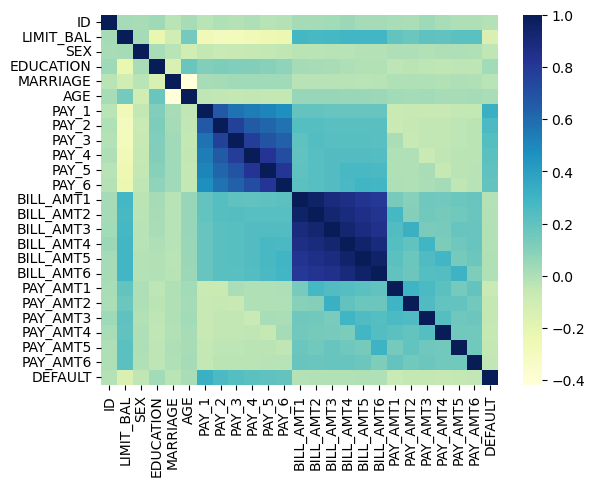

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df.corr()
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=False)
  
# displaying heatmap
plt.show()

# Data Exploration

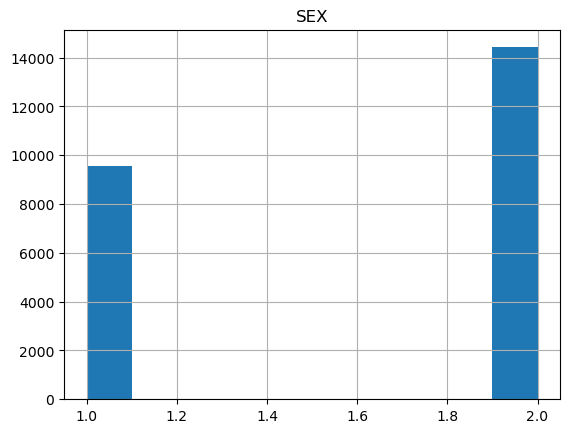

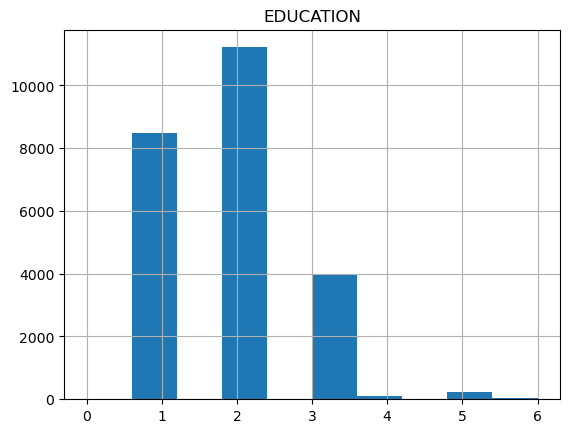

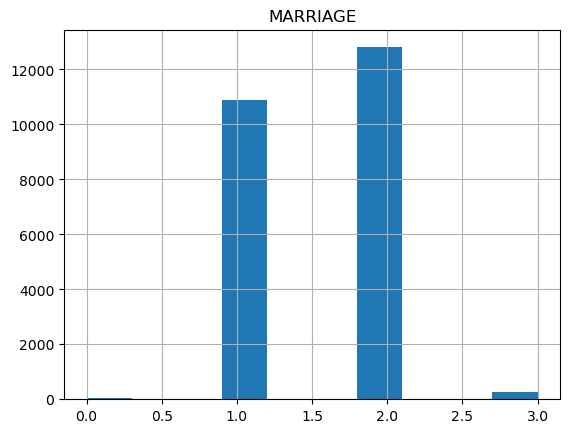

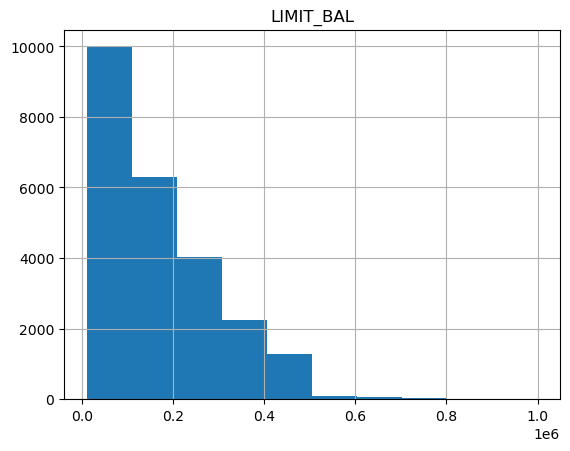

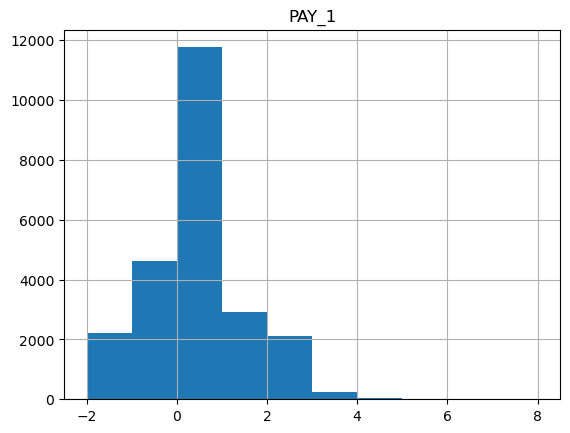

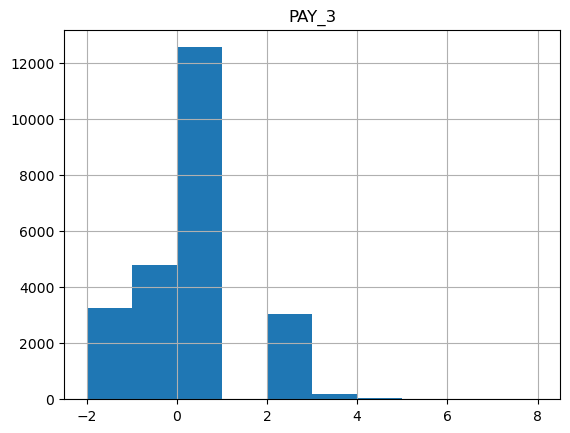

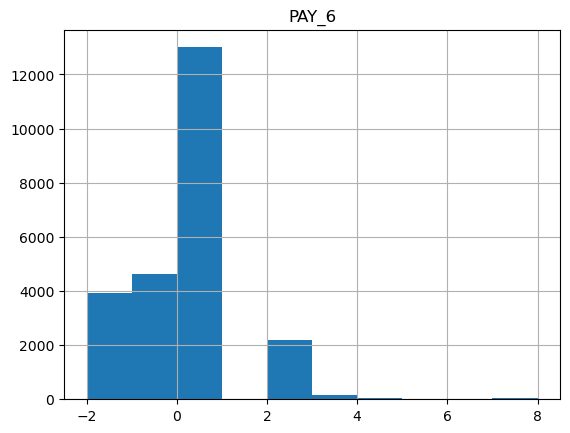

In [134]:
hist = df.hist(column='SEX')
hist = df.hist(column='EDUCATION')
hist = df.hist(column='MARRIAGE')

hist = df.hist(column='LIMIT_BAL')
hist = df.hist(column='PAY_1')
hist = df.hist(column='PAY_3')
hist = df.hist(column='PAY_6')


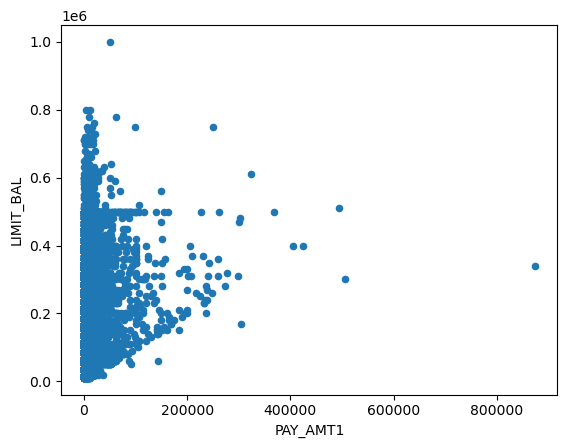

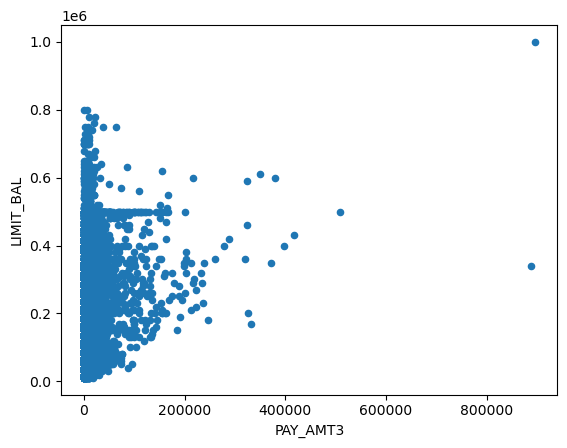

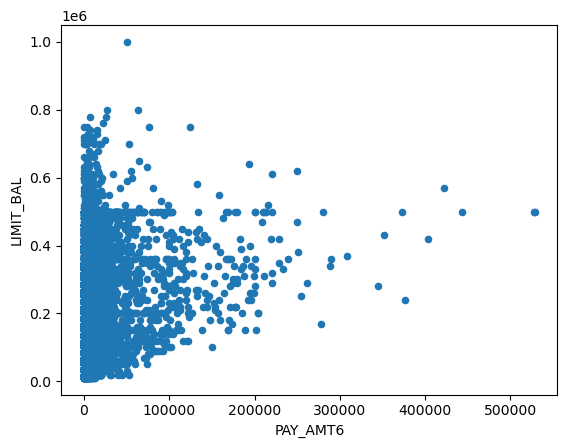

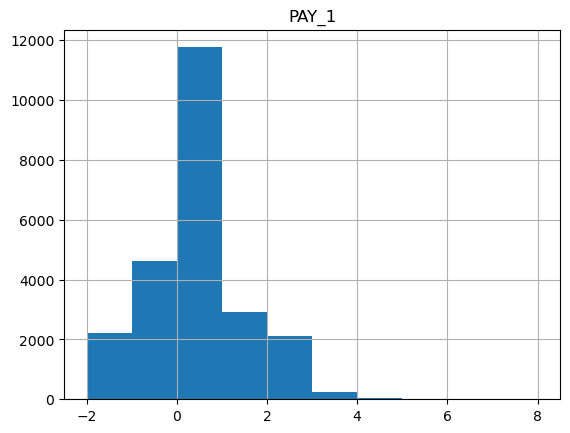

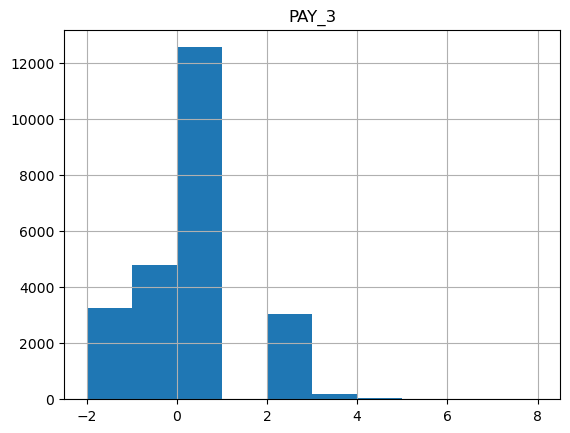

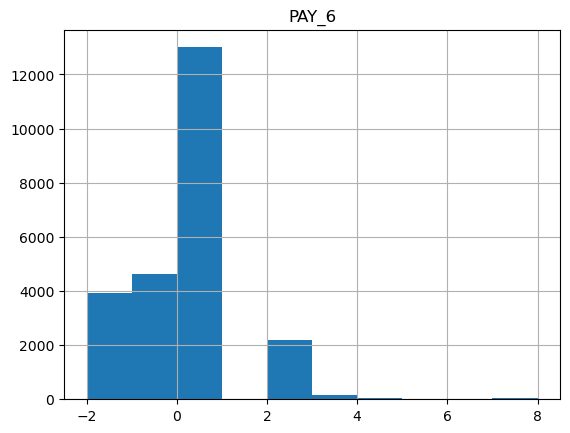

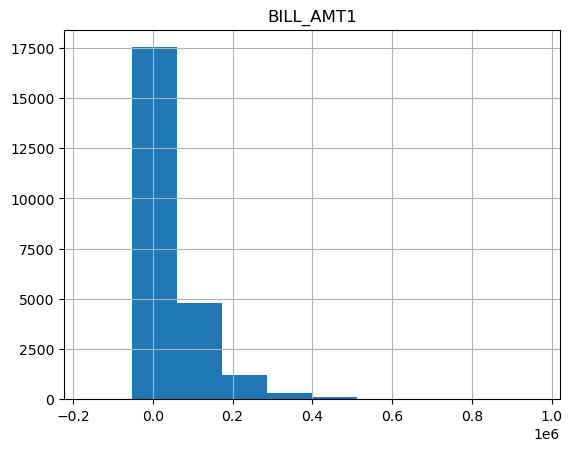

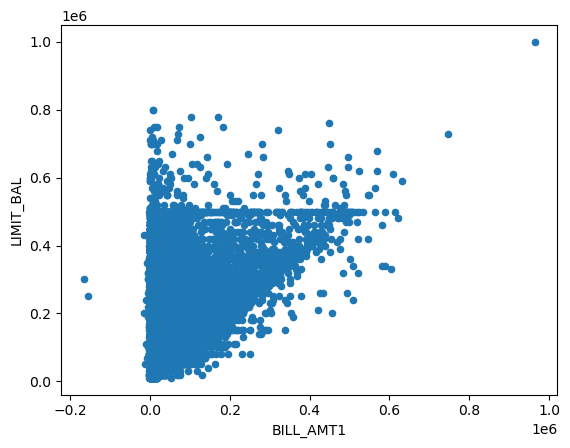

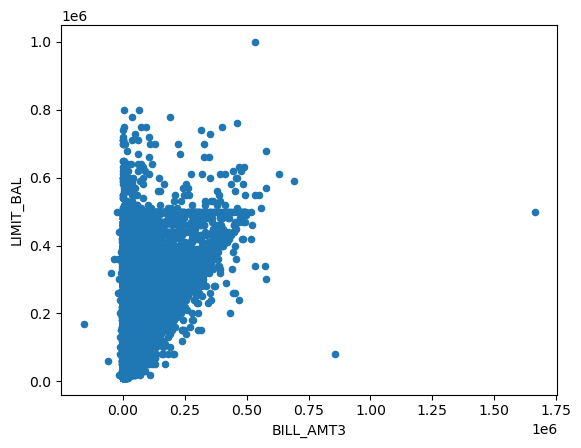

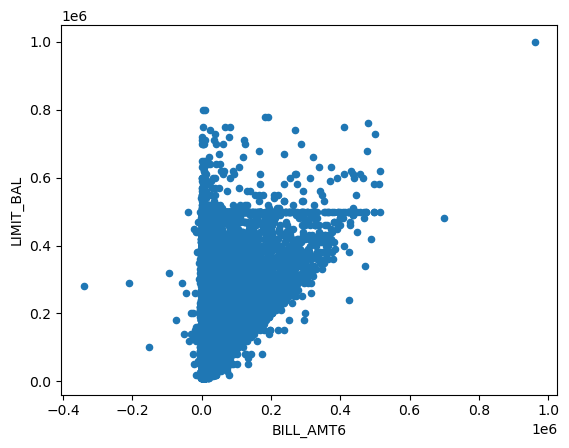

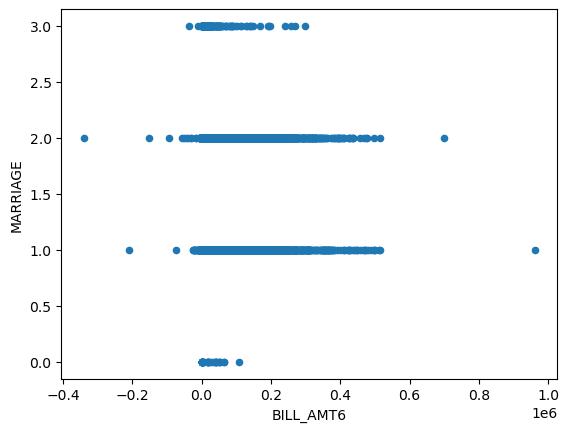

In [135]:
ax1 = df.plot.scatter(x='PAY_AMT1',
                      y='LIMIT_BAL')
ax1 = df.plot.scatter(x='PAY_AMT3',
                      y='LIMIT_BAL')
ax1 = df.plot.scatter(x='PAY_AMT6',
                      y='LIMIT_BAL')

hist = df.hist(column='PAY_1')
hist = df.hist(column='PAY_3')
hist = df.hist(column='PAY_6')


hist = df.hist(column='BILL_AMT1')

ax1 = df.plot.scatter(x='BILL_AMT1',
                      y='LIMIT_BAL')
ax1 = df.plot.scatter(x='BILL_AMT3',
                      y='LIMIT_BAL')
ax1 = df.plot.scatter(x='BILL_AMT6',
                      y='LIMIT_BAL')

ax1 = df.plot.scatter(x='BILL_AMT6',
                      y='MARRIAGE')

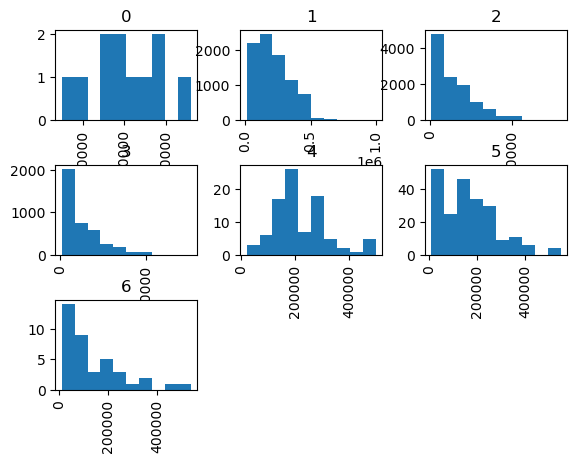

In [136]:
hist = df.hist(column='LIMIT_BAL',by='EDUCATION')

# 2 undergrad fall within 10-50k range for credit limit

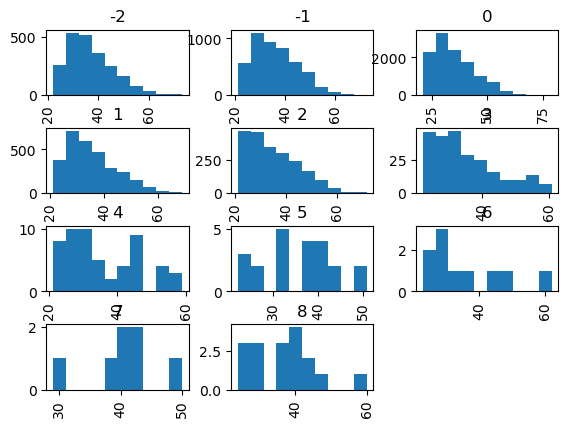

In [137]:
hist = df.hist(column='AGE',by='PAY_1')

# 0 = Revolving credit - majority of people between 20 - 40 have revolving credit

<AxesSubplot:title={'center':'LIMIT_BAL'}, xlabel='EDUCATION'>

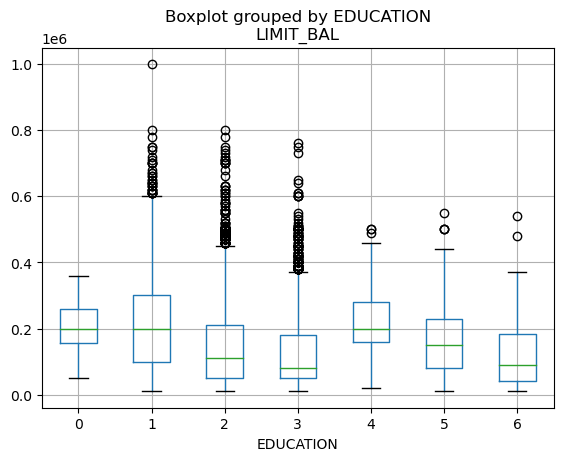

In [138]:
df.boxplot(column='LIMIT_BAL', by='EDUCATION')

# Data Cleaning & Feature Engineering

In [139]:
#feature engineering

#sum of bill amount and payments over 6 months
df['TTL_BILL'] = df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6']
df['TTL_PYMT'] = df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6']
df['TTL_PAY'] = df['PAY_1']+df['PAY_2']+df['PAY_3']+df['PAY_4']+df['PAY_5']+df['PAY_6']
df['RATIO']= df['TTL_PYMT']/df['TTL_BILL'].replace(0,0.0001)

#payment variance
payment_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
# Calculate the Payment Variance for each row
df['PMT_VAR'] = df[payment_columns].apply(lambda row: np.var(row), axis=1).replace(0,0.0001)

bill_columns = ['BILL_AMT1', 'BILL_AMT1', 'BILL_AMT1', 'BILL_AMT1', 'BILL_AMT1', 'BILL_AMT1']
# Calculate the Payment Variance for each row
df['PMT_VAR2'] = df[bill_columns].apply(lambda row: np.var(row), axis=1).replace(0,0.0001)

#lagged percentage of bill paid each month
df['BILL_PCT_PAID2'] = df['PAY_AMT1'] / df['BILL_AMT2'].replace(0,0.0001)
df['BILL_PCT_PAID3'] = df['PAY_AMT2'] / df['BILL_AMT3'].replace(0,0.0001)
df['BILL_PCT_PAID4'] = df['PAY_AMT3'] / df['BILL_AMT4'].replace(0,0.0001)
df['BILL_PCT_PAID5'] = df['PAY_AMT4'] / df['BILL_AMT5'].replace(0,0.0001)
df['BILL_PCT_PAID6'] = df['PAY_AMT5'] / df['BILL_AMT6'].replace(0,0.0001)


df['NEG_BILL_AMT1'] = df['BILL_AMT1'].apply(lambda x: 1 if x < 0 else 0)
df['NEG_BILL_AMT2'] = df['BILL_AMT2'].apply(lambda x: 1 if x < 0 else 0)
df['NEG_BILL_AMT3'] = df['BILL_AMT3'].apply(lambda x: 1 if x < 0 else 0)
df['NEG_BILL_AMT4'] = df['BILL_AMT4'].apply(lambda x: 1 if x < 0 else 0)
df['NEG_BILL_AMT5'] = df['BILL_AMT5'].apply(lambda x: 1 if x < 0 else 0)
df['NEG_BILL_AMT6'] = df['BILL_AMT6'].apply(lambda x: 1 if x < 0 else 0)


#How many times they no need to pay, paid in full, revolving credit, delay for n months in this 6 months period. n= any month from 1 to 8.
df['COUNT_PAY_MINUS_2'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == -2).sum(axis=1)
df['COUNT_PAY_MINUS_1'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == -1).sum(axis=1)
df['COUNT_PAY_0'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 0).sum(axis=1)
df['COUNT_PAY_1'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 1).sum(axis=1)
df['COUNT_PAY_2'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 2).sum(axis=1)
df['COUNT_PAY_3'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 3).sum(axis=1)
df['COUNT_PAY_4'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 4).sum(axis=1)
df['COUNT_PAY_5'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 5).sum(axis=1)
df['COUNT_PAY_6'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 6).sum(axis=1)
df['COUNT_PAY_7'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 7).sum(axis=1)
df['COUNT_PAY_8'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 8).sum(axis=1)


df['LOG_PAY_AMT1'] = np.log(df['PAY_AMT1'].replace(0,0.0001))
df['LOG_PAY_AMT2'] = np.log(df['PAY_AMT2'].replace(0,0.0001))
df['LOG_PAY_AMT3'] = np.log(df['PAY_AMT3'].replace(0,0.0001))
df['LOG_PAY_AMT4'] = np.log(df['PAY_AMT4'].replace(0,0.0001))
df['LOG_PAY_AMT5'] = np.log(df['PAY_AMT5'].replace(0,0.0001))
df['LOG_PAY_AMT6'] = np.log(df['PAY_AMT6'].replace(0,0.0001))

df['LOG_LIMIT_BAL'] = np.log(df['LIMIT_BAL'].replace(0,0.0001))
df['LOG_TTL_PYMT'] = np.log(df['TTL_PYMT'].replace(0,0.0001))
df['LOG_TTL_BILL'] = np.log(df['TTL_BILL'].apply(lambda x: 0.0001 if x < 1 else x))

df['PAY_AMT_AVG'] = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean(axis=1)
df['PAY_TREND'] = (df['PAY_AMT5']-df['PAY_AMT6'])+(df['PAY_AMT4']-df['PAY_AMT5'])+(df['PAY_AMT3']-df['PAY_AMT4'])+(df['PAY_AMT2']-df['PAY_AMT3'])+(df['PAY_AMT1']-df['PAY_AMT2'])


df['PAY_1_SQR'] = df['PAY_1']**2
df['PAY_2_SQR'] = df['PAY_2']**2
df['PAY_3_SQR'] = df['PAY_3']**2
df['PAY_4_SQR'] = df['PAY_4']**2
df['PAY_5_SQR'] = df['PAY_5']**2
df['PAY_6_SQR'] = df['PAY_6']**2


#credit utilization
df['CREDIT_UTILIZATION1'] = df['BILL_AMT1'].apply(lambda x: 0.0001 if x < 1 else x) / df['LIMIT_BAL']
df['CREDIT_UTILIZATION2'] = df['BILL_AMT2'].apply(lambda x: 0.0001 if x < 1 else x) / df['LIMIT_BAL'] 
df['CREDIT_UTILIZATION3'] = df['BILL_AMT3'].apply(lambda x: 0.0001 if x < 1 else x) / df['LIMIT_BAL'] 
df['CREDIT_UTILIZATION4'] = df['BILL_AMT4'].apply(lambda x: 0.0001 if x < 1 else x) / df['LIMIT_BAL'] 
df['CREDIT_UTILIZATION5'] = df['BILL_AMT5'].apply(lambda x: 0.0001 if x < 1 else x) / df['LIMIT_BAL'] 
df['CREDIT_UTILIZATION6'] = df['BILL_AMT6'].apply(lambda x: 0.0001 if x < 1 else x) / df['LIMIT_BAL'] 
df['CREDIT_UTILIZATION1'] = df['BILL_AMT1'] / df['LIMIT_BAL']
df['CREDIT_UTILIZATION2'] = df['BILL_AMT2'] / df['LIMIT_BAL'] 
df['CREDIT_UTILIZATION3'] = df['BILL_AMT3'] / df['LIMIT_BAL'] 
df['CREDIT_UTILIZATION4'] = df['BILL_AMT4'] / df['LIMIT_BAL'] 
df['CREDIT_UTILIZATION5'] = df['BILL_AMT5'] / df['LIMIT_BAL'] 
df['CREDIT_UTILIZATION6'] = df['BILL_AMT6'] / df['LIMIT_BAL'] 


In [140]:
# "Cleaning" the data -- part 1: converting data types that should be categorican into "category"

df['SEX'] = df['SEX'].astype('category')
df['EDUCATION'] = df['EDUCATION'].astype('category')
df['MARRIAGE'] = df['MARRIAGE'].astype('category')
#df['AGE'] = df['AGE'].astype('category')
df['PAY_1'] = df['PAY_1'].astype('category')
df['PAY_2'] = df['PAY_2'].astype('category')
df['PAY_3'] = df['PAY_3'].astype('category')
df['PAY_4'] = df['PAY_4'].astype('category')
df['PAY_5'] = df['PAY_5'].astype('category')
df['PAY_6'] = df['PAY_6'].astype('category')


df.info() # let check the result

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 76 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   24000 non-null  int64   
 1   LIMIT_BAL            24000 non-null  float64 
 2   SEX                  24000 non-null  category
 3   EDUCATION            24000 non-null  category
 4   MARRIAGE             24000 non-null  category
 5   AGE                  24000 non-null  int64   
 6   PAY_1                24000 non-null  category
 7   PAY_2                24000 non-null  category
 8   PAY_3                24000 non-null  category
 9   PAY_4                24000 non-null  category
 10  PAY_5                24000 non-null  category
 11  PAY_6                24000 non-null  category
 12  BILL_AMT1            24000 non-null  float64 
 13  BILL_AMT2            24000 non-null  float64 
 14  BILL_AMT3            24000 non-null  float64 
 15  BILL_AMT4          

In [141]:
def CombineRareCategories(data, mincount):
    for col in data.columns:
        if (type(data[col][0]) == str):
            for index, row in pd.DataFrame(data[col].value_counts()).iterrows():
                if ( row[0] < mincount):
                    df[col].replace(index, 'Other_' + col, inplace = True)
                else:
                    None

# lets apply this functino to our data with mincount=10
CombineRareCategories(df, 10)

df[0:10] #lets check the result

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,TTL_BILL,TTL_PYMT,TTL_PAY,RATIO,PMT_VAR,PMT_VAR2,BILL_PCT_PAID2,BILL_PCT_PAID3,BILL_PCT_PAID4,BILL_PCT_PAID5,BILL_PCT_PAID6,NEG_BILL_AMT1,NEG_BILL_AMT2,NEG_BILL_AMT3,NEG_BILL_AMT4,NEG_BILL_AMT5,NEG_BILL_AMT6,COUNT_PAY_MINUS_2,COUNT_PAY_MINUS_1,COUNT_PAY_0,COUNT_PAY_1,COUNT_PAY_2,COUNT_PAY_3,COUNT_PAY_4,COUNT_PAY_5,COUNT_PAY_6,COUNT_PAY_7,COUNT_PAY_8,LOG_PAY_AMT1,LOG_PAY_AMT2,LOG_PAY_AMT3,LOG_PAY_AMT4,LOG_PAY_AMT5,LOG_PAY_AMT6,LOG_LIMIT_BAL,LOG_TTL_PYMT,LOG_TTL_BILL,PAY_AMT_AVG,PAY_TREND,PAY_1_SQR,PAY_2_SQR,PAY_3_SQR,PAY_4_SQR,PAY_5_SQR,PAY_6_SQR,CREDIT_UTILIZATION1,CREDIT_UTILIZATION2,CREDIT_UTILIZATION3,CREDIT_UTILIZATION4,CREDIT_UTILIZATION5,CREDIT_UTILIZATION6
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0,689.0,-2,0.089434,6.593347e+04,0.0001,0.000000,1.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,2,2,0,0,2,0,0,0,0,0,0,-9.210340,6.535241,-9.210340,-9.210340,-9.210340,-9.210340,9.903488,6.535241,8.949495,114.833333,0.0,4,4,1,1,4,4,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000
1,2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0,11018.0,0,0.108388,2.053601e+06,0.0001,0.108220,0.110628,0.069779,0.066899,0.064313,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,7.325149,7.313220,6.907755,6.907755,6.907755,8.517193,11.407565,9.307286,11.529320,1836.333333,-3482.0,0,0,0,0,0,0,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767
2,3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0,8388.0,0,0.036259,1.904497e+05,0.0001,0.041465,0.040961,0.042382,0.037985,0.036180,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,7.600902,7.610358,7.090077,7.003065,6.974479,6.907755,10.819778,9.034557,12.351618,1398.000000,1000.0,0,0,0,0,0,0,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940
3,4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0,59049.0,-2,0.540054,1.583835e+08,0.0001,0.352734,1.023608,0.477555,0.470072,0.036015,0,0,0,0,0,0,0,2,4,0,0,0,0,0,0,0,0,7.600902,10.510014,9.210340,9.104980,6.535241,6.520621,10.819778,10.986123,11.602208,9841.500000,1321.0,1,0,1,0,0,0,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620
4,5,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,238114.0,7772.0,0,0.032640,4.247572e+05,0.0001,0.043807,0.031506,0.033876,0.050971,0.049940,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,7.824046,7.503841,6.487684,6.907755,6.907755,6.684612,10.819778,8.958283,12.380505,1295.333333,1700.0,0,0,0,0,0,0,1.288000,1.141380,1.152160,0.387880,0.392380,0.400480
5,6,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,13486.0,4791.0,-3,0.355257,3.735469e+05,0.0001,1.000000,1.000000,0.000000,-3.654088,2.975309,0,0,0,0,1,0,0,3,3,0,0,0,0,0,0,0,0,5.940171,6.398595,-9.210340,6.364751,7.430707,7.340836,11.512925,8.474494,9.509407,798.500000,-1162.0,0,1,1,0,0,1,0.118760,0.003800,0.006010,0.002210,-0.001590,0.005670
6,7,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0,65212.0,6761.0,2,0.103677,1.108391e+06,0.0001,0.236166,0.000000,0.035378,0.084796,0.268889,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,8.110427,-9.210340,6.068426,6.907755,6.907755,6.907755,11.849398,8.818926,11.085399,1126.833333,2329.0,0,0,4,0,0,0,0.080607,0.100686,0.086486,0.087221,0.084236,0.026564
7,8,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0,26919.0,14129.0,-10,0.524871,2.286158e+07,0.0001,0.000000,0.000000,0.000000,1.000000,0.080650,0,0,0,0,0,0,4,2,0,0,0,0,0,0,0,0,0,-9.2

In [142]:
pd.DataFrame(df).isna().sum() # Lets check if we have any missing data -- the result shows that yes, and a lot

ID                     0
LIMIT_BAL              0
SEX                    0
EDUCATION              0
MARRIAGE               0
AGE                    0
PAY_1                  0
PAY_2                  0
PAY_3                  0
PAY_4                  0
PAY_5                  0
PAY_6                  0
BILL_AMT1              0
BILL_AMT2              0
BILL_AMT3              0
BILL_AMT4              0
BILL_AMT5              0
BILL_AMT6              0
PAY_AMT1               0
PAY_AMT2               0
PAY_AMT3               0
PAY_AMT4               0
PAY_AMT5               0
PAY_AMT6               0
DEFAULT                0
TTL_BILL               0
TTL_PYMT               0
TTL_PAY                0
RATIO                  0
PMT_VAR                0
PMT_VAR2               0
BILL_PCT_PAID2         0
BILL_PCT_PAID3         0
BILL_PCT_PAID4         0
BILL_PCT_PAID5         0
BILL_PCT_PAID6         0
NEG_BILL_AMT1          0
NEG_BILL_AMT2          0
NEG_BILL_AMT3          0
NEG_BILL_AMT4          0


In [143]:
df = pd.get_dummies(df, columns = df.select_dtypes(exclude=['int64','float64']).columns, drop_first = True)

pd.options.display.max_columns = None 
pd.options.display.max_columns = None 


df.head()  

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,TTL_BILL,TTL_PYMT,TTL_PAY,RATIO,PMT_VAR,PMT_VAR2,BILL_PCT_PAID2,BILL_PCT_PAID3,BILL_PCT_PAID4,BILL_PCT_PAID5,BILL_PCT_PAID6,NEG_BILL_AMT1,NEG_BILL_AMT2,NEG_BILL_AMT3,NEG_BILL_AMT4,NEG_BILL_AMT5,NEG_BILL_AMT6,COUNT_PAY_MINUS_2,COUNT_PAY_MINUS_1,COUNT_PAY_0,COUNT_PAY_1,COUNT_PAY_2,COUNT_PAY_3,COUNT_PAY_4,COUNT_PAY_5,COUNT_PAY_6,COUNT_PAY_7,COUNT_PAY_8,LOG_PAY_AMT1,LOG_PAY_AMT2,LOG_PAY_AMT3,LOG_PAY_AMT4,LOG_PAY_AMT5,LOG_PAY_AMT6,LOG_LIMIT_BAL,LOG_TTL_PYMT,LOG_TTL_BILL,PAY_AMT_AVG,PAY_TREND,PAY_1_SQR,PAY_2_SQR,PAY_3_SQR,PAY_4_SQR,PAY_5_SQR,PAY_6_SQR,CREDIT_UTILIZATION1,CREDIT_UTILIZATION2,CREDIT_UTILIZATION3,CREDIT_UTILIZATION4,CREDIT_UTILIZATION5,CREDIT_UTILIZATION6,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0,689.0,-2,0.089434,6.593347e+04,0.0001,0.000000,1.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,2,2,0,0,2,0,0,0,0,0,0,-9.210340,6.535241,-9.210340,-9.210340,-9.210340,-9.210340,9.903488,6.535241,8.949495,114.833333,0.0,4,4,1,1,4,4,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0,11018.0,0,0.108388,2.053601e+06,0.0001,0.108220,0.110628,0.069779,0.066899,0.064313,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,7.325149,7.313220,6.907755,6.907755,6.907755,8.517193,11.407565,9.307286,11.529320,1836.333333,-3482.0,0,0,0,0,0,0,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0,8388.0,0,0.036259,1.904497e+05,0.0001,0.041465,0.040961,0.042382,0.037985,0.036180,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,7.600902,7.610358,7.090077,7.003065,6.974479,6.907755,10.819778,9.034557,12.351618,1398.000000,1000.0,0,0,0,0,0,0,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0,59049.0,-2,0.540054,1.583835e+08,0.0001,0.352734,1.023608,0.477555,0.470072,0.036015,0,0,0,0,0,0,0,2,4,0,0,0,0,0,0,0,0,7.600902,10.510014,9.210340,9.104980,6.535241,6.520621,10.819778,10.986123,11.602208,9841.500000,1321.0,1,0,1,0,0,0,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,50000.0,37,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,238114.0,7772.0,0,0.032640,4.247572e+05,0.0001,0.043807,0.031506,0.033876,0.050971,0.049940,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,7.824046,7.503841,6.487684,6.907755,6.907755,6.684612,10.819778,8.958283,12.380505,1295.333333,1700.0,0,0,0,0,0,0,1.288000,1.141380,1.152160,0.387880,0.392380,0.400480,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0

In [144]:
y = df['DEFAULT']
X = df.drop(columns = ['DEFAULT', 'ID'])

In [145]:
np.random.seed(77300)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19200, 133)
(4800, 133)
(19200,)
(4800,)


In [146]:
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()


In [147]:
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

# Confusion Matrix returns in the format: cm[0,0], cm[0,1], cm[1,0], cm[1,1]: tn, fp, fn, tp

# Sensitivity
def custom_sensitivity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))

# Specificity
def custom_specificity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))

# Positive Predictive Value
def custom_ppv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))

# Negative Predictive Value
def custom_npv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fn))

# Accuracy
def custom_accuracy_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))

#simulate profit calculation normalized to 1000 applications
def custom_profit_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (((tn/(tn+fn+tp+fp))*1000)*1500) + (((fn/(tn+fn+tp+fp))*1000)*-5000)

print(y.value_counts())

0    18694
1     5306
Name: DEFAULT, dtype: int64


In [148]:
# define the model and call it classifier_LR
classifier_LR = LogisticRegression(solver='liblinear',penalty="l1")

# train classifier_LR on the training data
classifier_LR.fit(X_train, y_train)

# This is a regression, so it has coefficients -- lets see them
# Note, there is no easy way to show significance, etc. with sklearn
print('Intercept: ' + str(classifier_LR.intercept_))
print('Coefficients (10 largest and 10 smallest) [recall, there are 252 of them, in total: ')
summary = pd.DataFrame([X_test.columns,classifier_LR.coef_[0]]).transpose().sort_values(by = 1, ascending = False)
summary.columns = ['Variable','Coefficient']
top10positive = summary.head(10) # 10 largest (by value)
top10negative = summary.tail(10) # 10 smallest (by value)
top10list=pd.DataFrame()
top10list= top10list.append(pd.DataFrame(data = top10positive))
top10list= top10list.append(pd.DataFrame(data = top10negative))
top10list


Intercept: [0.]
Coefficients (10 largest and 10 smallest) [recall, there are 252 of them, in total: 


,Variable,Coefficient
78,PAY_1_2,0.979774
79,PAY_1_3,0.896077
110,PAY_4_4,0.659788
72,MARRIAGE_1,0.511582
74,MARRIAGE_3,0.499463
61,CREDIT_UTILIZATION3,0.385627
67,EDUCATION_2,0.378536
115,PAY_5_-1,0.348871
116,PAY_5_0,0.343601
66,EDUCATION_1,0.339636


In [149]:
pd.options.display.max_rows = None 

df.isnull().sum()


ID                     0
LIMIT_BAL              0
AGE                    0
BILL_AMT1              0
BILL_AMT2              0
BILL_AMT3              0
BILL_AMT4              0
BILL_AMT5              0
BILL_AMT6              0
PAY_AMT1               0
PAY_AMT2               0
PAY_AMT3               0
PAY_AMT4               0
PAY_AMT5               0
PAY_AMT6               0
DEFAULT                0
TTL_BILL               0
TTL_PYMT               0
TTL_PAY                0
RATIO                  0
PMT_VAR                0
PMT_VAR2               0
BILL_PCT_PAID2         0
BILL_PCT_PAID3         0
BILL_PCT_PAID4         0
BILL_PCT_PAID5         0
BILL_PCT_PAID6         0
NEG_BILL_AMT1          0
NEG_BILL_AMT2          0
NEG_BILL_AMT3          0
NEG_BILL_AMT4          0
NEG_BILL_AMT5          0
NEG_BILL_AMT6          0
COUNT_PAY_MINUS_2      0
COUNT_PAY_MINUS_1      0
COUNT_PAY_0            0
COUNT_PAY_1            0
COUNT_PAY_2            0
COUNT_PAY_3            0
COUNT_PAY_4            0


In [150]:
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1] # probabilities

class_threshold = 0.230769231

y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # applying the threshold rule to classify

print(y_pred_prob[0:15]) # first 5 probabilities
print(y_pred[0:15]) # resultant predicted classification
print(y_test[0:15]) # actual outcomes


[0.16545501 0.81058289 0.03316285 0.15517071 0.3894435  0.21259796
 0.30153136 0.81908803 0.09316499 0.25195078 0.26121853 0.09800756
 0.18073704 0.09966136 0.56302441]
[0 1 0 0 1 0 1 1 0 1 1 0 0 0 1]
14634    0
7633     1
5598     0
6502     0
20174    0
1766     0
3478     0
1735     1
11740    0
12806    0
944      0
19274    0
6625     0
16922    0
19419    1
Name: DEFAULT, dtype: int64


# Logistic Regression

Metrics of the logistic regression model: 

Confusion matrix: 
[[3095  426]
 [ 644  635]]
                                   Accuracy: 0.7770833333333333
                   SENSITIVITY (aka RECALL): 0.5984919886899152
                 SPECIFICITY (aka FALL-OUT): 0.8277614335383793
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.49648162627052383
                 NEGATIVE PREDICTIVE VALUE): 0.8790116444191991


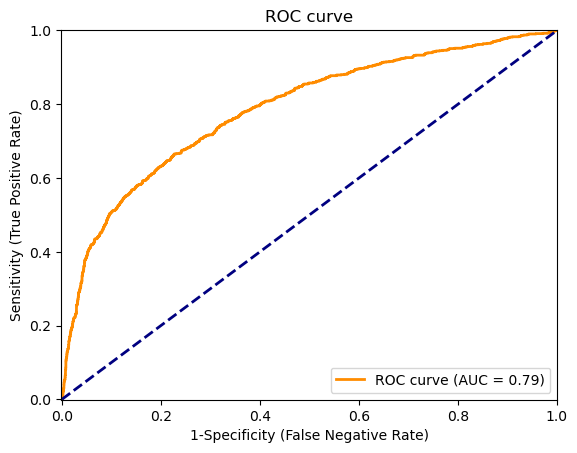

 AUC: 0.7854234816095167


In [70]:
print('Metrics of the logistic regression model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))

print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

In [107]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=classifier_LR, n_features_to_select=20, step=1) 
rfe.fit(X_train, y_train)
ranking = rfe.ranking_.reshape(len(X_train.columns))

pd.DataFrame([X_test.columns,ranking]).transpose().sort_values(1).head(30)

KeyboardInterrupt: 

In [ ]:
classifier_LR_RFE = rfe.fit(X_train, y_train)

y_pred_prob = classifier_LR_RFE.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

print('Metrics of the logistic regression model after variable selection: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

# Classification and regression Tree, CART

In [ ]:
classifier_DT = DecisionTreeClassifier(max_leaf_nodes = 5, random_state=77300) 

classifier_DT.fit(X_train, y_train)

y_pred_prob = classifier_DT.predict_proba(X_test)[:,1] 
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) 

print(y_pred_prob[0:5]) 
print(y_pred[0:5])
print(y_test[0:5]) 

In [ ]:
list(X_train.columns)

In [ ]:
from sklearn import tree

plt.figure(figsize=(40,20))
tree.plot_tree(classifier_DT.fit(X_train, y_train), feature_names = list(X_train.columns), filled = True,
               class_names = ['Not Default', 'Default'], rounded = True)
print('CART tree with 5 leafs')

In [ ]:
print('Metrics of the CART model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

DecisionTreeClassifier()

In [ ]:
n_max_leaf_nodes = range(5,40) 

array = []
for n in n_max_leaf_nodes:

    classifier_DT = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
    classifier_DT = classifier_DT.fit(X_train, y_train)

    y_pred_prob = classifier_DT.predict_proba(X_test)[:,1]
    y_pred = np.where(y_pred_prob > class_threshold, 1, 0)

    array.append([n,roc_auc_score(y_test, y_pred_prob)])

array = pd.DataFrame(array)
plt.scatter(array[0],array[1])

array = []
for n in n_max_leaf_nodes:

    classifier_DT = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
    classifier_DT = classifier_DT.fit(X_train, y_train)

    y_pred_prob = classifier_DT.predict_proba(X_train)[:,1]
    y_pred = np.where(y_pred_prob > class_threshold, 1, 0)

    array.append([n,roc_auc_score(y_train, y_pred_prob)])

array = pd.DataFrame(array)
plt.scatter(array[0],array[1])

plt.xlabel('Hyper-parameter max_leaf_nodes')
plt.ylabel('AUC')

plt.legend(['Testing set','Training set'])


In [ ]:
classifier_DT = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = 8)
classifier_DT = classifier_DT.fit(X_train, y_train)

y_pred_prob = classifier_DT.predict_proba(X_test)[:,1]
y_pred = np.where(y_pred_prob > class_threshold, 1, 0)

print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

In [ ]:
importances = classifier_DT.feature_importances_

# plot them
plt.figure(figsize=(15,5))
plt.title('Feature Importance')
plt.xlabel('Decrease in Gini (recal, Gini = 2*AUC-1)')
feature_importances = pd.Series(classifier_DT.feature_importances_, index=X_train.columns)
feature_importances.nlargest(15).sort_values().plot(kind='barh', align='center')

print(feature_importances.nlargest(15))

# Random Forest

In [ ]:
classifier_RF = RandomForestClassifier(random_state=77300) # recall what random_state mean

classifier_RF.fit(X_train, y_train)

In [ ]:
y_pred_prob = classifier_RF.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

print('Metrics of the Random Forest model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))


## Hyper Parameter Tuning 

In [ ]:
score_func = make_scorer(roc_auc_score, greater_is_better=True)

n_trees = [150] # as an example, we will tune the "numeber of trees" hyper-parameter (n_trees) and we will consider values of 100, 200, ... 600 trees in the forest
Grid_srch_parameters_list = [ [{'n_estimators':n_trees}] ]

# we will apply a 5-fold cross-validation and call the resultant function "grid_search"
grid_search = GridSearchCV(estimator = classifier_RF,
                           cv = 5,
                           param_grid = Grid_srch_parameters_list[0],
                           scoring = score_func,
                           return_train_score = True)

# apply function grid_search to the training data, call the resultand best model grid_search_RF
grid_search_RF = grid_search.fit(X_train, y_train)

# use the best model to predict the testing data
y_pred_prob = grid_search_RF.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

print('Optimized hyper-parameters:' + str(grid_search.best_params_))

# Lets look at the model metrics

print('Metrics of the Random Forest model with the optimized hyper-parameter for the "number of trees": \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))


In [ ]:
importances = grid_search_RF.best_estimator_.feature_importances_

# plot them
plt.figure(figsize=(15,5))
plt.title('Feature Importance')
plt.xlabel('Decrease in Gini (recal, Gini = 2*AUC-1)')
feature_importances = pd.Series(classifier_RF.feature_importances_, index=X_train.columns)
feature_importances.nlargest(15).sort_values().plot(kind='barh', align='center')


# Gradient Boosting Machine (GBM)

In [151]:
# Define the gradient boosting machine model and call it classifier_GBM
classifier_GBM = GradientBoostingClassifier(random_state=77300)

# Train the model classifier_GBM on the training data
classifier_GBM.fit(X_train, y_train)

GradientBoostingClassifier(random_state=77300)

Metrics of the Gradient Boosting Machine model: 

Confusion matrix: 
[[3026  380]
 [ 713  681]]
                                   Accuracy: 0.7722916666666667
                   SENSITIVITY (aka RECALL): 0.6418473138548539
                 SPECIFICITY (aka FALL-OUT): 0.8093073014174913
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.4885222381635581
                 NEGATIVE PREDICTIVE VALUE): 0.8884321785085144


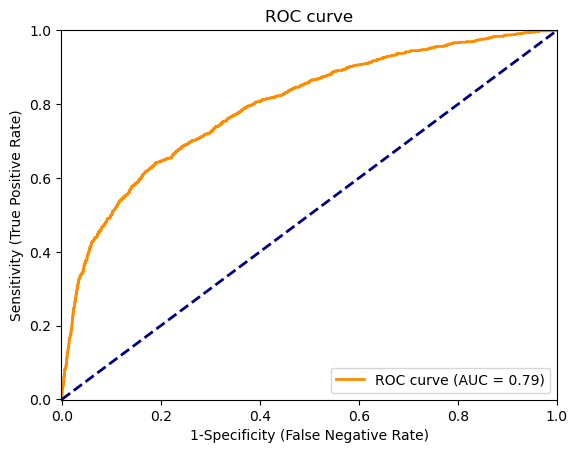

 AUC: 0.7949346357861792
Projected Profit: $549791.6666666667


In [152]:
# Use the trained model to predict testing data
y_pred_prob = classifier_GBM.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

# Lets look at the model metrics

print('Metrics of the Gradient Boosting Machine model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))
print("Projected Profit: $"+str(custom_profit_score(y_test,y_pred)))

TTL_PAY                0.325296
COUNT_PAY_2            0.230685
PAY_1_SQR              0.151156
PAY_1_2                0.036448
LOG_TTL_BILL           0.022808
BILL_AMT1              0.022519
RATIO                  0.018197
LOG_TTL_PYMT           0.016299
CREDIT_UTILIZATION2    0.014040
CREDIT_UTILIZATION1    0.013361
TTL_BILL               0.011388
PAY_AMT3               0.009411
CREDIT_UTILIZATION3    0.008777
LOG_LIMIT_BAL          0.007586
LOG_PAY_AMT3           0.006679
dtype: float64


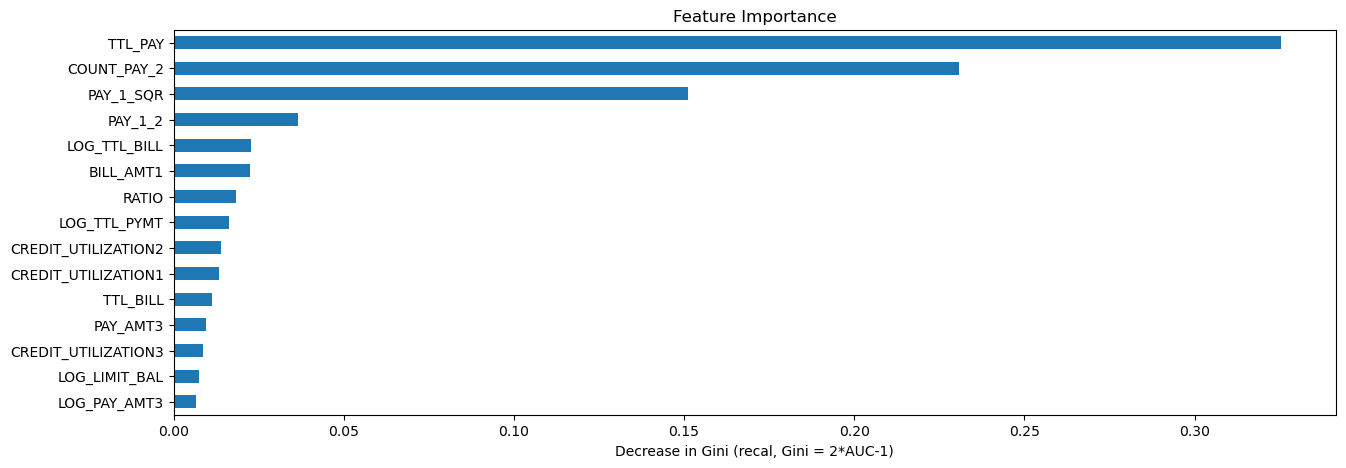

In [153]:
importances = classifier_GBM.feature_importances_

# plot them
plt.figure(figsize=(15,5))
plt.title('Feature Importance')
plt.xlabel('Decrease in Gini (recal, Gini = 2*AUC-1)')
feature_importances = pd.Series(classifier_GBM.feature_importances_, index=X_train.columns)
feature_importances.nlargest(15).sort_values().plot(kind='barh', align='center')

print(feature_importances.nlargest(15))

## Hyper Parameter Tuning 

Optimized hyper-parameters:{'learning_rate': 0.15, 'n_estimators': 150}
Metrics of the Gradient Boosting Machine model with the optimized hyper-parameters": 

Confusion matrix: 
[[3018  383]
 [ 721  678]]
                                   Accuracy: 0.77
                   SENSITIVITY (aka RECALL): 0.6390197926484449
                 SPECIFICITY (aka FALL-OUT): 0.807167691896229
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.48463187991422446
                 NEGATIVE PREDICTIVE VALUE)   : 0.8873860629226697


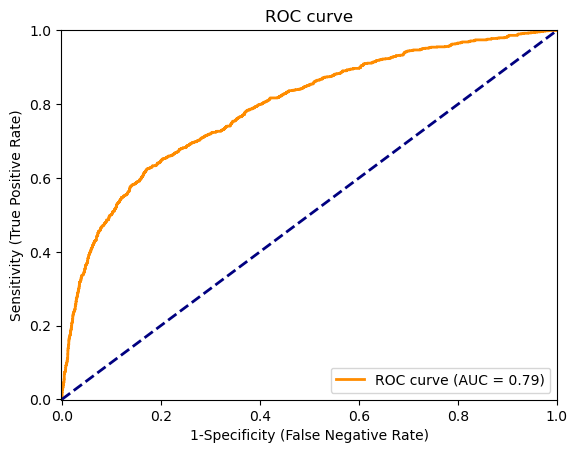

 AUC: 0.7911052439338869
Projected Profit: $544166.6666666667


In [154]:
# Hyper-parameter tuning ("optimization") using the function GridSearchCV for maximizing AUC
score_func = make_scorer(roc_auc_score, greater_is_better=True)

# as an example, we will tune two parameters
n_trees = [150] # first, the "numeber of trees" hyper-parameter (n_trees) and we will consider values of 100, 200, ... 600 trees in the forest
learning_rates = [0.15] # second, speed of boosting ("learning rate") and we will consider two values 0.01 и 0.1

Grid_srch_parameters_list = [ [{'n_estimators':n_trees, 'learning_rate': learning_rates}] ]

# we will apply a 5-fold cross-validation and call the resultant function "grid_search"
grid_search = GridSearchCV(estimator = classifier_GBM, cv = 5, param_grid = Grid_srch_parameters_list[0], scoring = score_func,
                              return_train_score = True)

# # apply function grid_search to the training data, call the resultant best model grid_search_GBM
grid_search_GBM = grid_search.fit(X_train, y_train)

# use the best model to predict the testing data
y_pred_prob = grid_search_GBM.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

print('Optimized hyper-parameters:' + str(grid_search.best_params_))

# Lets look at the model metrics

print('Metrics of the Gradient Boosting Machine model with the optimized hyper-parameters": \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE)   : " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))
print("Projected Profit: $"+str(custom_profit_score(y_test,y_pred)))

TTL_PAY                0.307542
COUNT_PAY_2            0.177032
PAY_1_SQR              0.136307
PAY_1_2                0.027416
BILL_AMT1              0.025374
LOG_TTL_PYMT           0.021019
CREDIT_UTILIZATION1    0.020465
LOG_TTL_BILL           0.017878
RATIO                  0.017503
CREDIT_UTILIZATION2    0.016328
TTL_BILL               0.014247
CREDIT_UTILIZATION6    0.012420
PAY_AMT3               0.010341
PMT_VAR                0.010239
CREDIT_UTILIZATION3    0.009859
dtype: float64


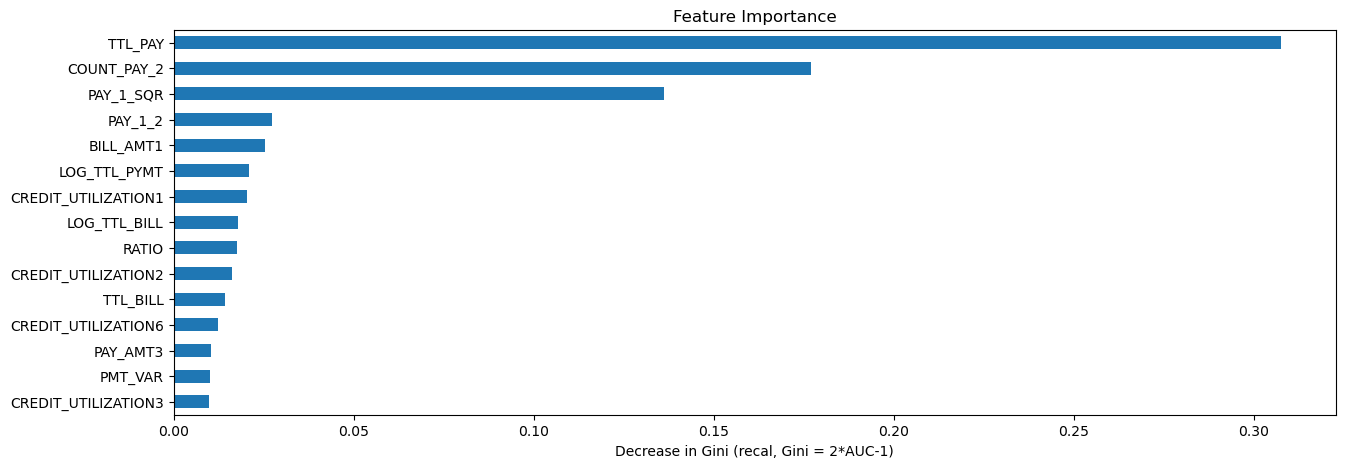

In [155]:
importances = grid_search_GBM.best_estimator_.feature_importances_

# plot them
plt.figure(figsize=(15,5))
plt.title('Feature Importance')
plt.xlabel('Decrease in Gini (recal, Gini = 2*AUC-1)')
feature_importances = pd.Series(grid_search_GBM.best_estimator_.feature_importances_, index=X_train.columns)
feature_importances.nlargest(15).sort_values().plot(kind='barh', align='center')
 
print(feature_importances.nlargest(15))

# Support Vector Machines (SVM)

In [ ]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svm_estimators = []
svm_estimators.append(('standardize', StandardScaler())) # scale the data
svm_estimators.append(('svm', svm.SVC(probability=True))) # define SVM with probabilities (recall, SVM be default does not predict probabilities)

# Define the support vectors machine model and call it classifier_SVM
Classifier_SVM = Pipeline(svm_estimators, verbose=False)

# Train the model classifier_SVM on the training data
Classifier_SVM.fit(X_train, y_train)

In [ ]:
# use the fitted model to predict the testing data
y_pred_prob = Classifier_SVM.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

# Lets look at the model metrics

print('Metrics of the Support Vector Machines model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))
print("Projected Profit: $"+str(custom_profit_score(y_test,y_pred)))